# Import Library

In [518]:
# all imports used 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split



# Data Analysis

In [519]:
# reading data from csv file 
df=pd.read_csv('Covid Dataset.csv')
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [521]:
df.describe(include='all')

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [522]:
columns=df.columns
columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [523]:
df['COVID-19'].value_counts()

Yes    4383
No     1051
Name: COVID-19, dtype: int64

# Finding Missing Values


In [524]:
# create a table with data missing 
missing_counts=df.isnull().sum() # missing values

missing_percent = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_counts': missing_counts,
    'missing_percent %': missing_percent 
}
frame=pd.DataFrame(value)
frame

,missing_counts,missing_percent %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


# Data Transformation


In [525]:

# label_encoder object knows how to understand word labels.
label_encoder = LabelEncoder()
for col in columns:  
# Encode labels in columns .
    df[col]= label_encoder.fit_transform(df[col])
df.head()  

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


# Info About Data After Transformation

In [526]:
df.describe(include='all')

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,...,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.0,5434.0,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,...,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.0,0.0,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,...,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.0,0.0,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


array([[<AxesSubplot:title={'center':'Breathing Problem'}>,
        <AxesSubplot:title={'center':'Fever'}>,
        <AxesSubplot:title={'center':'Dry Cough'}>,
        <AxesSubplot:title={'center':'Sore throat'}>,
        <AxesSubplot:title={'center':'Running Nose'}>],
       [<AxesSubplot:title={'center':'Asthma'}>,
        <AxesSubplot:title={'center':'Chronic Lung Disease'}>,
        <AxesSubplot:title={'center':'Headache'}>,
        <AxesSubplot:title={'center':'Heart Disease'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Hyper Tension'}>,
        <AxesSubplot:title={'center':'Fatigue '}>,
        <AxesSubplot:title={'center':'Gastrointestinal '}>,
        <AxesSubplot:title={'center':'Abroad travel'}>,
        <AxesSubplot:title={'center':'Contact with COVID Patient'}>],
       [<AxesSubplot:title={'center':'Attended Large Gathering'}>,
        <AxesSubplot:title={'center':'Visited Public Exposed Places'}>,
        <AxesSubplot:title=

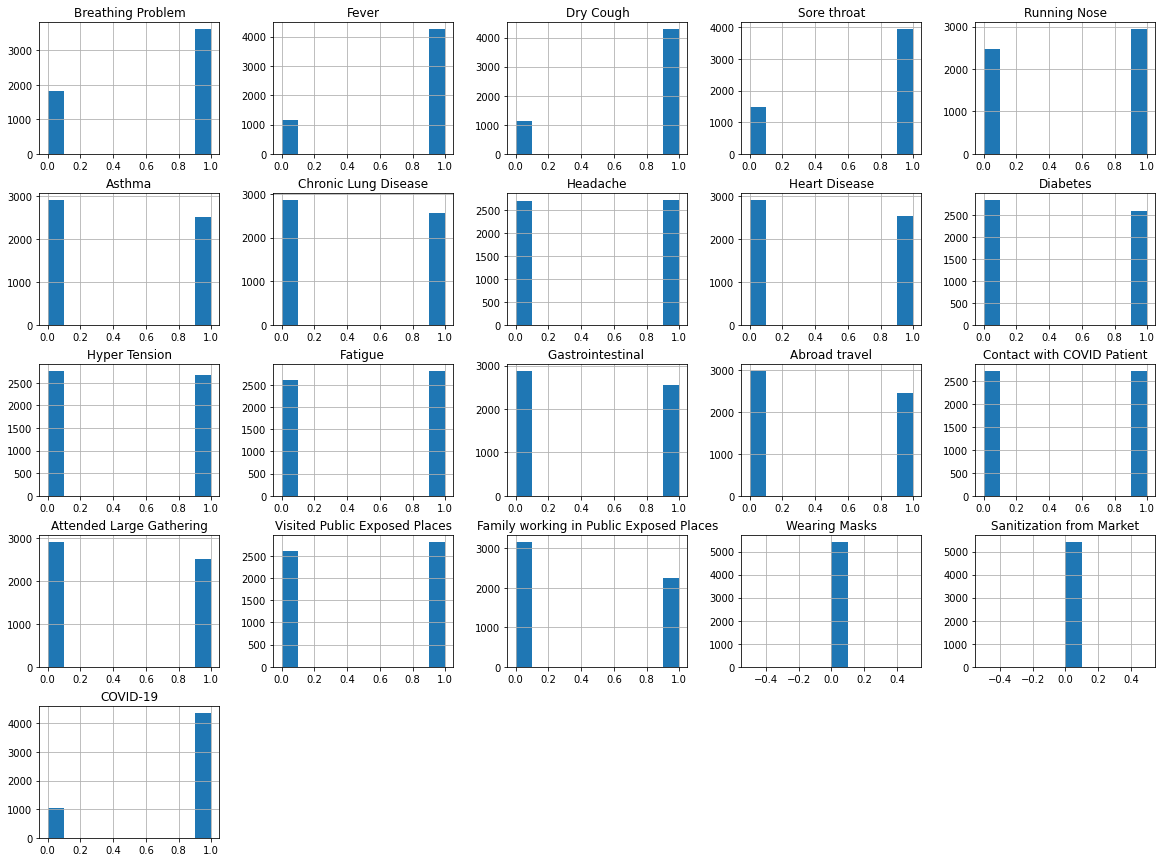

In [527]:
df.hist(figsize=(20,15))

# Features Selection

In [528]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,nan,nan,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,nan,nan,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,nan,nan,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,nan,nan,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,nan,nan,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,nan,nan,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,nan,nan,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,nan,nan,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,nan,nan,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,nan,nan,0.040627


In [529]:
# split the label from the features 
x=df.drop('COVID-19',axis=1)
y=df['COVID-19']


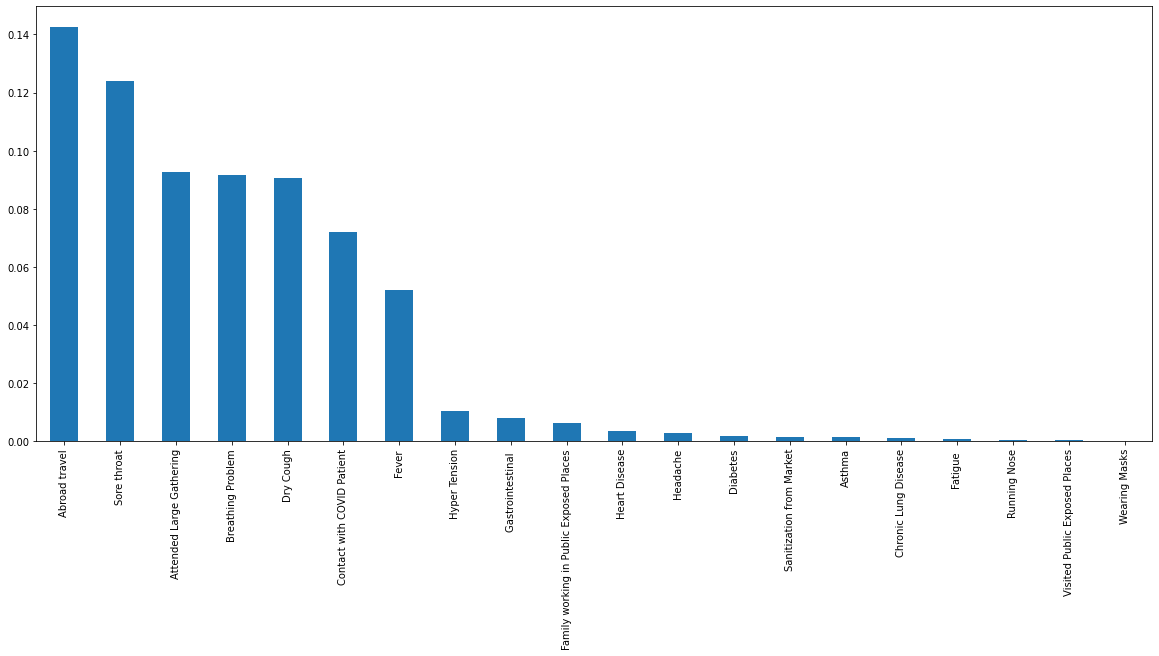

In [530]:
#####################
# determine the mutual information
mutual_info = mutual_info_classif(x, y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns
# sort values descending
mutual_info=mutual_info.sort_values(ascending=False)
#let's plot the ordered mutual_info values per feature
mutual_info.plot.bar(figsize=(20, 8))
# get features' names of the max 14 ones
features_selected=(mutual_info[:14]).index
# drop any other feature from our dataset
x = x.drop(x.columns.difference(features_selected), axis=1)
